In [1]:
#r312386@163.com
#2024-02-06

        该出血量预测工程是某省级科研课题内容，本人负责主要的数据清理与机器学习。
        这份笔记记录了从原始数据处理到建模的主要步骤。
        不讨论科研内容，仅记录代码方法，以便查阅。


        一、预处理
                涉及处理：列名、合并、分词、缺失值、计算天数、热力图、编码（建议使用Ctrl+f查找相关内容）
        二、建模

一、预处理

In [3]:
#一、预处理 数据基础来源excel的xlsx或xls，读取转换为csv
import pandas as pd
df01=pd.read_excel("asd.xlsx")
df01.to_csv("asd.csv",index=True)

In [4]:
#中文列修改为英文   ##列名
#直接在excel中修改即可

#pandas名称修改方法--字典key为原始名称，value是修改后要的名称
df01.rename(columns = {"Postpartum hemorrhage": "Ph","past_operation_diagnosis":"POD",'Number_of_pregnancies':'NOP','Infant_weight':'IW'},inplace=True)

#指定列名，直接获得指定列名和对应列，见下一部分代码

In [ ]:
#原始数据有多份产妇和胎儿两类信息，由id对应进行合并
import pandas as pd
import os

#显示问题
# pd.set_option('display.width',130)
# pd.set_option('display.max_colwidth', 10)#单列宽度
# pd.set_option('display.max_columns',1300)
# pd.set_option('display.unicode.ambiguous_as_wide', True)
# pd.set_option('display.unicode.east_asian_width', True)


#产妇信息，信息一
list01=[4, 5 ,7,8,9,10,11,12,13,14,15,16,17,19,20,
        22,23,24,25,26,27,28,29,30,38,39,40,41,42,43,44
        ,45,46,47,48,50,52]
listname=["id","Operation_name","w","h",
          "Anesthesia_method","VD_num","AD_num",
          "OthHospital","Total_inflow","Total_output",
          "Bleeding_vol","NNIS","antibiotic",
          "Standard_prevention","infection_mode",
          "Position","Anesthetic_effect","Incision_grade",
          "Surgical_grade","DurTime","SurTime",
          "AneTime","AnePreTiem","EntryPreTime",
          "Circuiting_nurses","Operation_nurses",
          "Anesthesiologist_3","Anesthesiologist_2"
          ,"Anesthesiologist_1","assistant_2","assistant_1",
          "Doctor","ASA","past_operation_diagnosis",
          "operating_table","ET","b_o_d"]
#胎儿信息，信息二
list02=[2,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,
    21,22,23,24,25,28,29,30,31,32,33,34,35,36,
    38,39,40,41,42,43,44,45,46]
listname_2=["id","Delivery_mode","Placental_size","wop","ucl",
            "uca","ucae","ucb","ucul","ucll",
            "uct","uce","af","Multi","Still","mal",
            "sex","Infant_w","Infant_h","min_1","min_5","min_10",
            "Surgical_indication","age","Number of pregnancies",
            "parity","Gestational_week","position of foetus",
            "Fetal_heart","presentation","hr",
            "pattern","First_stage_of_labor",
            "Second_stage_of_labor","Third_stage_of_labor",
            "tt","Perineal_condition","blood_pressure",
            "Bleeding_vol_2","cause_of_bleeding",
            "SS"
            ]

#读取 合并不同时间的产妇或胎儿信息
data_path=os.path.join("..","data","usedata","信息")
data_set01=pd.DataFrame()
for root,dirs,files in os.walk(data_path):
    for file in files:
        data_temp=pd.read_excel(os.path.join(data_path,file),usecols=list01,names=listname)
        data_set01=pd.concat([data_set01,data_temp],axis=0,ignore_index=True)

data_path_2=os.path.join("..","data","usedata","胎儿")
data_set02=pd.DataFrame()
for root,dirs,files in os.walk(data_path_2):
    for file in files:
        data_temp=pd.read_excel(os.path.join(data_path_2,file),usecols=list02,names=listname_2)
        data_set02=pd.concat([data_set02,data_temp],axis=0,ignore_index=True)
# print(data_set01)
# print(data_set02)
        


#合并产妇和胎儿信息
data_merge=pd.merge(data_set01,data_set02,on=["id"],how="inner")
data_merge=data_merge.drop(data_merge[data_merge["w"]==" "].index)
data_merge=data_merge.drop(data_merge[data_merge["h"]==" "].index)

print(data_merge)

data_merge.to_excel("./data_merge3.xls",sheet_name="merged")
data_merge.to_csv("./data_merge3.csv")

In [ ]:
#分词
#数据中，术前、术后诊断、胎儿大小等列，由空格、特殊符号等方式间隔了多项信息，分割成多列

data_base=pd.read_csv("data_merge.csv")
newpod_names={0:"pod_1",1:"pod_2",
            2:"pod_3",3:"pod_4",
            4:"pod_5",5:"pod_6",6:"pod_7",7:"pod_8",8:"pod_9"}
newbod_names={0:"bod_1",1:"bod_2",
            2:"bod_3",3:"bod_4",
            4:"bod_5",5:"bod_6",6:"bod_7",7:"bod_8",8:"bod_9",9:"bod_10"}
newsi_names={0:"si_1",1:"si_2",
            2:"si_3",3:"si_4",
            4:"si_5",5:"si_6",6:"si_7",7:"si_8",8:"si_9"}
newsize_names={0:"psize_1",1:"psize_2",
            2:"psize_3"}
data_base=pd.concat([data_base, data_base['past_operation_diagnosis'].str.split(' ', expand=True).rename(columns=newpod_names)], axis=1)
data_base=pd.concat([data_base, data_base['b_o_d'].str.split(' ', expand=True).rename(columns=newbod_names)], axis=1)
data_base=pd.concat([data_base, data_base['Surgical_indication'].str.split(' ', expand=True).rename(columns=newsi_names)], axis=1)
data_base=pd.concat([data_base, data_base['Placental_size'].str.split('*', expand=True).rename(columns=newsize_names)], axis=1)


data_base.to_excel("./data_splited11.xls",sheet_name="merged")
data_base.to_csv("./data_splited11.csv")


In [ ]:
#检查空值
data.isnull().sum()#查看是否有空值


#可视化 ？-> 特征太多了直观一点
missing = data.isnull().sum()
missing = missing[missing > 0]
missing.sort_values(inplace=True)
missing.plot.bar()

In [ ]:
#绘制所有变量的柱形图，查看数据
data.hist(bins=50,figsize=(20,15))
plt.cla()  #清除axes

In [ ]:
#连续变量：查看各特征与目标变量Postpartum hemorrhage的相关性
#把字符串类型的变量、以及一些无关的变量去掉,获得需要的列名
numeric_columns=data.select_dtypes(exclude='object').columns
columns=[col for col in numeric_columns if col not in ['ID']]#这里ID这一列已经被手工删除了
#根据列名提取数据
train_set=data[columns]
#计算各列与出血量的相关性
correlation=train_set.corr()
correlation['Postpartum hemorrhage'].sort_values(ascending = False)

In [ ]:
correlation['Postpartum hemorrhage'].sort_values(ascending = False)[:10]

In [ ]:
import seaborn as sns
#绘制热力图1
plt.figure(figsize=(20,15))
list1=['Postpartum hemorrhage','AneTime','SurTime','DurTime','ASA','Anesthesia_method','Surgical_grade','Cl']
a = data[list1]
sns.heatmap(a.corr(),annot=True ,cmap="Blues" )
plt.show()

In [8]:
#绘制热力图2
f , ax = plt.subplots(figsize =(7,7))
plt.title('Correlation of Numeric Features with Price',y=1,size=16)
sns.heatmap(correlation,square = True,vmax=0.8)

In [10]:
# 删除出血量空缺的行 这是要预测的y
data = data.dropna(subset=['Postpartum hemorrhage'])
data.isnull().sum()

In [ ]:
# 1、使用常数0填充缺失值
# data['Age']=data['Age'].fillna(0)
# 2、使用均值填充缺失值
# data['Age']=data['Age'].fillna(data['Age'].mean)
# 3、使用中值填充缺失值
# data['Age']=data['Age'].fillna(data['Age'].median)
# 4、使用众数填充缺失值
# data['Age']=data['Age'].fillna(data['Age'].mode)

In [ ]:
# 使用平均数填充'w','h','Low blood pressure'这几列
data['w']=data['w'].fillna(data['w'].mean())
data['h']=data['h'].fillna(data['h'].mean())
data['Low blood pressure']=data['Low blood pressure'].fillna(data['Low blood pressure'].mean())
data.isnull().sum()

In [ ]:
# 使用众数填充'Surgical_grade','ET'这几列
data['Surgical_grade']=data['Surgical_grade'].fillna(data['Surgical_grade'].mode())
data['ASA']=data['ASA'].fillna(data['ASA'].mode())
data.isnull().sum()

In [ ]:
# 使用0填充'Prenatal_symptoms'这几列,表示没有伴随症状
data['Prenatal_symptoms']=data['Prenatal_symptoms'].fillna(0)
data.isnull().sum()

In [ ]:
#对离散特征进行onehot编码
data = pd.get_dummies(data, columns=['position of foetus', 'presentation', 'Prenatal_symptoms',
                                     'Anesthesia_method', 'Surgical_grade', 'ASA classification','Emergency treatment'])
print(data.shape)
data.columns

In [ ]:
#处理产前症状  术前诊断中由许多症状，主要观察是否具有以下几种 这里与上述的one-hot和split操作有功能重复
data4=data3.copy()
complication_list=[
"妊娠合并甲状腺功能减退",
"妊娠期血小板减少",
"子痫前期",
"胎盘早剥",
"妊娠期糖尿病",
"产间发热",
"妊娠合并子宫肌瘤",
"绒毛膜羊膜炎",
"妊娠期高血压",
"前置胎盘",
"胎盘植入"]
complication_record=['complication_1','complication_2','complication_3']#excel中记录病人所有合并症的列
data4[complication_list]=0
data4['其他产前症状']=0
data4['无产前症状']=0
for name in complication_list:
    for i in range(len(data4)):#len(data4)
        if [j for j in complication_record if str(data4[j].iloc[i]).find(name)>=0]:
#原来的写法，需要挨个输入列名if data.iloc[i]['pod_3'].find(name)>=0 or data.iloc[i]['pod_4'].find(name)>=0 or data.iloc[i]['pod_5'].find(name)>=0:
            data4[name].iloc[i]=1#注意必须要先列后行，才能修改。否则只能返回该值
    #注意dataframe中找到的空值是nan字段，所以以前的写法 !=np.nan不对
        elif [z for z in complication_record if str(data4[z].iloc[i]) != 'nan']: 
            data4['其他产前症状'].iloc[i]=1
        else:
            data4['无产前症状'].iloc[i]=1
present_list=complication_record+['其他产前症状','无产前症状']+complication_list
data4[present_list].head(40)

In [ ]:
#5.处理胎次和双胞胎 原始数据格式类似 “ 孕40周第一胎头位” 检查第一第二等字样
data5=data4.copy()
parity_list=['第一','第二','第三','第四','第五','第六','第七']#胎次，指某次分娩后某个孩子出生时在其母亲所有活产胎儿中所占的顺序数。
#胎数：number of fetus,这里只记录有双胎

data5['parity']=1#初始值不能为0，因为可能有漏写
for i in range(len(data5)):
    for j in range(len(parity_list)):
        if str(data5['POD'].iloc[i]).find(parity_list[j])>=0:
            data5['parity'].iloc[i]=j+1#注意必须要先列后行，才能修改。否则只能返回该值

data5['twins']=0
for i in range(len(data5)):
    if str(data5['POD'].iloc[i]).find('双胎')>=0:
        data5['twins'].iloc[i]=1#注意必须要先列后行，才能修改。否则只能返回该值
present_list=['POD','parity','twins']
data5[present_list].head(30)

In [ ]:
#6.麻醉种类编码
data6=data5.copy()#深拷贝，前面内容修改后面不会修改。直接用=就是浅拷贝，后面随着前面改
Anesthesia_method_list=[
    '腰硬联合麻醉',
    '硬膜外麻醉',
    '全身麻醉',
    '蛛网膜下腔阻滞麻醉']

    #'静脉麻醉'出现也算全身麻醉
Anesthesia_method_record=['Anesthesia_method']#去excel对应的列搜索
data6['其他麻醉方式']=0
data6[Anesthesia_method_list]=0
for name in Anesthesia_method_list: #bug原因：例如搜索‘硬膜外麻醉’时，假如这一项为“腰硬联合麻醉”，前三个if全为false
    for i in range(len(data6)):
        if [j for j in Anesthesia_method_record if data6[j].iloc[i].find(name)>=0]:
            data6[name].iloc[i]=1#注意必须要先列后行，才能修改。否则只能返回该值
        elif [z for z in Anesthesia_method_record if data6[z].iloc[i].find('静脉麻醉')>=0]:
            data6['全身麻醉'].iloc[i]=1
        elif [z for z in Anesthesia_method_record if data6[z].iloc[i].find('硬膜外腔阻滞麻醉')>=0]:
            data6['硬膜外麻醉'].iloc[i]=1
for i in range(len(data6)):
    if(sum(data6[Anesthesia_method_list].iloc[i])==0):
        data6['其他麻醉方式'].iloc[i]=1
present_list=Anesthesia_method_list+['其他麻醉方式']+Anesthesia_method_record
# copy_data[['Anesthesia_method','腰硬联合麻醉','硬膜外麻醉','全身麻醉','蛛网膜下腔阻滞麻醉','其他麻醉方式']]

data6[present_list].head(40)

In [ ]:
#8.处理ET编码  et：emergency treatment

data8=data7.copy()#深拷贝，前面内容修改后面不会修改。直接用=就是浅拷贝，后面随着前面改

ET_list=['ET_emergency','ET_predict']#去excel对应的列搜索
data8[ET_list]=0
record_cloumn=['ET']
for i in range(len(data8)):#避免有空字符
    if str(data7[record_cloumn].iloc[i]).find('急诊')>=0:
        data8['ET_emergency'].iloc[i]=1 
    elif str(data7[record_cloumn].iloc[i]).find('择期')>=0:
        data8['ET_predict'].iloc[i]=1
    else:
        data8['ET_emergency'].iloc[i]=1#其他情况用众数替换
        
present_list=ET_list+record_cloumn
data8[present_list].head(50)

In [ ]:
#处理ASA   ASA:一种麻醉分级标准
data7=data6.copy()#深拷贝，前面内容修改后面不会修改。直接用=就是浅拷贝，后面随着前面改

ASA_list=['ASA_L1','ASA_L2','ASA_L3','ASA_L4','ASA_L5']#去excel对应的列搜索
data7[ASA_list]=0
record_cloumn=['ASA']
# for i in range(len(data7)):#这种写法不行，因为Ⅱ等字符前面有空格
#     if data7[record_cloumn].iloc[i]=='Ⅰ':
#         data7['ASA_L1'].iloc[i]=1
#     elif data7[record_cloumn].iloc[i]=='Ⅱ':
#         data7['ASA_L2'].iloc[i]=1
#     elif str(data7[record_cloumn].iloc[i])=='Ⅲ':
#         data7['ASA_L3'].iloc[i]=1
#     elif data7[record_cloumn].iloc[i]=='Ⅳ':
#         data7['ASA_L4'].iloc[i]=1    
#     elif data7[record_cloumn].iloc[i]=='Ⅴ':
#         data7['ASA_L5'].iloc[i]=1
#     else:
#         data7['ASA_L2'].iloc[i]=1#其他情况用众数替换

for i in range(len(data7)):#这种写法不行，因为Ⅱ等字符前面有空格
    if str(data7[record_cloumn].iloc[i]).find('Ⅰ')>=0:
        data7['ASA_L1'].iloc[i]=1
    elif str(data7[record_cloumn].iloc[i]).find('Ⅱ')>=0:
        data7['ASA_L2'].iloc[i]=1
    elif str(data7[record_cloumn].iloc[i]).find('Ⅲ')>=0:
        data7['ASA_L3'].iloc[i]=1
    elif str(data7[record_cloumn].iloc[i]).find('Ⅳ')>=0:
        data7['ASA_L4'].iloc[i]=1    
    elif str(data7[record_cloumn].iloc[i]).find('Ⅴ')>=0:
        data7['ASA_L5'].iloc[i]=1
    else:
        data7['ASA_L2'].iloc[i]=1#其他情况用众数替换

# for name in ASA_list:
#     for i in range(len(data7)):
#         if [j for j in record_cloumn if data7[j].iloc[i].find(name)>=0]:
#             data7[name].iloc[i]=1
#         else:
#             data7['ASA_L2'].iloc[i]=1
                
present_list=ASA_list+record_cloumn
data7[present_list].head(50)

In [ ]:

def outlier_work_std(Processing_data,sigma):#离群值处理
    series1=Processing_data.copy()
    series1[series1>series1.mean()+series1.std()*sigma]=int(series1.mean())+int(series1.std()*sigma)
    series1[series1<series1.mean()-series1.std()*sigma]=int(series1.mean())-int(series1.std()*sigma)
    return series1


#计算怀孕天数  #计算天数
data9=data8.copy()#深拷贝，前面内容修改后面不会修改。直接用=就是浅拷贝，后面随着前面改
record_cloumn=['Gestational_week']
#处理怀孕天数,参考('33+2').split('+')
data9['Pregnancy_days']=0
check_list=['.','`'] #检查脏数据  

fun1=lambda:int(week_daylist[0])*7+int(week_daylist[1]) if week_daylist[1] else int(week_daylist[0])*7
#bug 原因部分数据格式为 32+ 没有日数
for i in range(len(data9)):
    if str(data9['Gestational_week'].iloc[i]).find('+')>=0:
        for c in check_list:
            data9['Gestational_week'].iloc[i]=str(data9['Gestational_week'].iloc[i]).replace(c,'') #脏字删除
#         print('提取的单元格',data9['Gestational_week'].iloc[i])
        week_daylist=str(data9['Gestational_week'].iloc[i]).split('+')
        data9['Pregnancy_days'].iloc[i]=int(week_daylist[0])*7+int(week_daylist[1]) if week_daylist[1] else int(week_daylist[0])*7
#         data9['Pregnancy_days'].iloc[i]=fun1#这么写报错

    else:
        data9['Pregnancy_days'].iloc[i]=int(data9['Gestational_week'].iloc[i])*7#有空值，会报错
#如果怀孕天数太少，说明记录有问题
data9['Pregnancy_days']=outlier_work_std(data9['Pregnancy_days'],5)

present_list=['Pregnancy_days']+record_cloumn
data9[present_list].head(50)

In [ ]:
#删除处理完成的数据，重命名  虽然初始时修改了列名，但是刚刚的一些处理又使用了中文名称如术前诊断的部分。
data10=data9.copy()
drop_column=['Anesthesia_method','ASA','POD','ET','Gestational_week','blood_pressure','complication_1','complication_2','complication_3']
data10.drop(drop_column, axis=1, inplace=True)
rename_dict={"妊娠合并甲状腺功能减退": "PWH",
             "妊娠期血小板减少":"POD",
             '子痫前期':'preeclampsia',
             '胎盘早剥':'PAB',
             '妊娠期糖尿病':'GD',
             '产间发热':'IF',
             '妊娠合并子宫肌瘤':'PAH',
             '绒毛膜羊膜炎':'chorioamnionitis',
             '妊娠期高血压':'PIH',
            '前置胎盘':'placenta',
            '胎盘植入':'PAC',
             '其他产前症状':'OPS',
             '无产前症状':'NPS',
             '腰硬联合麻醉':'CSEA',
              '硬膜外麻醉':'EBA',
              '全身麻醉':'GA',
              '蛛网膜下腔阻滞麻醉':'SA',
             '其他麻醉方式':'OAM',
             'blood_pressure_low':'BPL',
             'blood_pressure_high':'BPH'
            }
data10.rename(columns =rename_dict ,inplace=True)

data10.head(40)#删除处理完成的数据，重命名
data10=data9.copy()
drop_column=['Anesthesia_method','ASA','POD','ET','Gestational_week','blood_pressure','complication_1','complication_2','complication_3']
data10.drop(drop_column, axis=1, inplace=True)
rename_dict={"妊娠合并甲状腺功能减退": "PWH",
             "妊娠期血小板减少":"POD",
             '子痫前期':'preeclampsia',
             '胎盘早剥':'PAB',
             '妊娠期糖尿病':'GD',
             '产间发热':'IF',
             '妊娠合并子宫肌瘤':'PAH',
             '绒毛膜羊膜炎':'chorioamnionitis',
             '妊娠期高血压':'PIH',
            '前置胎盘':'placenta',
            '胎盘植入':'PAC',
             '其他产前症状':'OPS',
             '无产前症状':'NPS',
             '腰硬联合麻醉':'CSEA',
              '硬膜外麻醉':'EBA',
              '全身麻醉':'GA',
              '蛛网膜下腔阻滞麻醉':'SA',
             '其他麻醉方式':'OAM',
             'blood_pressure_low':'BPL',
             'blood_pressure_high':'BPH'
            }
data10.rename(columns =rename_dict ,inplace=True)

data10.head(40)

In [ ]:
#可视化
now = datetime.datetime.now()
now = now.strftime('%y-%m-%d-%H-%M')
plt.figure(figsize=(15,10))
plt.rcParams['xtick.direction'] = 'in'#将x周的刻度线方向设置向内
plt.rcParams['ytick.direction'] = 'in'#将y轴的刻度方向设置向内

missing = data.isnull().sum()#统计每一列的缺失项
missing = missing[missing > 0]#筛选出缺失项大于0的项数
missing.sort_values(inplace=True)#对这些内容进行排序
missing.plot.bar()#写具体数字

for x, y in enumerate(missing): 
    plt.text(x, y + 100, '%s' % round(y, 1), ha='center',fontsize=20)

plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
# plt.title('Missing value Analysis')
plt.xlabel('Missing Item',fontsize=20)
plt.ylabel('Missing value',fontsize=20)
savefig("Missing value Analysis{}.jpg".format(now),dpi=400,bbox_inches = 'tight')
plt.show()

二、建模

In [ ]:
def work(i,model):
    print(i+1)
    if i<13:
        model.fit(X_train,y_train)
        print(model,' : ', model.score(X_test,y_test))
        dict[list2[i]]=model.score(X_test,y_test)
    else:
        model.fit(X_train,y_train.astype('int'))
        print(model,' : ', model.score(X_test,y_test.astype('int')))
        dict[list2[i]]=model.score(X_test,y_test.astype('int'))

In [ ]:
dict={}
list2=['SVR',
'AdaBoostRegressor',
'RandomForestRegressor',
'ExtraTreesRegressor',
'GradientBoostingRegressor',
'Ridge',
'Lasso',
'ElasticNet',
'LassoLars',
'BayesianRidge',
'LinearRegression',
'DecisionTreeRegressor','MLPRegressor',
'LinearDiscriminantAnalysis',
'LogisticRegression',
'GaussianNB']

In [ ]:
from sklearn.svm import SVR
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import LassoLars
from sklearn.linear_model import BayesianRidge
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB

In [ ]:
model_1=SVR()
model_2=AdaBoostRegressor()
model_3=RandomForestRegressor()
model_4=ExtraTreesRegressor()
model_5=GradientBoostingRegressor()
model_6=LogisticRegression()
model_7=Ridge()
model_8=Lasso()
model_9=ElasticNet()
model_10=LassoLars()
model_11=BayesianRidge()
model_12=LinearRegression()
model_13=DecisionTreeRegressor()
model_14=MLPRegressor()
model_15=LinearDiscriminantAnalysis()
model_16=GaussianNB()

In [ ]:
list3=[model_1, #0
model_2,#1
model_3,#2
model_4,#3
model_5,#4
model_7,#5
model_8,#6
model_9,#7
model_10,#8
model_11,#9
model_12,#10
model_13,#11
model_14,#12
model_15,#13
model_6,#14
model_16]#15

In [ ]:
for i,j in enumerate(list3):
    work(i,j)
    print('\n\n')

1
SVR()  :  -0.2272260889894009



2
AdaBoostRegressor()  :  0.0016547176871686275



3
RandomForestRegressor()  :  0.1587278253636013



4
ExtraTreesRegressor()  :  0.09768098107161072



5
GradientBoostingRegressor()  :  0.19117001573504



6
Ridge()  :  0.028872234305931554



7
Lasso()  :  -6.974012625482473e-05



8
ElasticNet()  :  -6.974012625482473e-05



9
LassoLars()  :  -6.974012625482473e-05



10
BayesianRidge()  :  0.028073576900278563



11
LinearRegression()  :  0.028874298960727574



12
DecisionTreeRegressor()  :  -0.501031110255169



13


D:\ANACONDA\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPRegressor()  :  0.1037510537014974



14
LinearDiscriminantAnalysis()  :  0.5767386091127098



15
LogisticRegression()  :  0.5833333333333334



16
GaussianNB()  :  0.21942446043165467





D:\ANACONDA\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


模型（二）

In [ ]:
data_processed=pd.read_csv('data_processed.csv')
pd.set_option('display.max_columns', None)# 显示所有列（否则会以省略号的形式省略）
data_processed#第一列在后面被自动忽略，因为没有列名

,HB,WBC,PLT,PT,INR,APTT,TT,FIB,Na,K,Cl,Ca,Ph,weight,height,IW,age,NOP,BPL,BPH,PWH,POD,preeclampsia,PAB,GD,IF,PAH,chorioamnionitis,PIH,placenta,PAC,OPS,NPS,parity,twins,OAM,CSEA,EBA,GA,SA,ASA_L1,ASA_L2,ASA_L3,ASA_L4,ASA_L5,ET_emergency,ET_predict,Pregnancy_days
0,117.0,11.89,383.0,11.4,0.95,32.3,14.3,3.60,137.5,3.98,102.5,2.15,573,62,160,1530,29,1,80,128,1,0,0,0,0,0,0,0,0,0,0,1,0,1,1,0,1,0,0,0,0,1,0,0,0,0,1,233
1,117.0,11.89,383.0,11.4,0.95,32.3,14.3,3.60,137.5,3.98,102.5,2.15,573,62,160,990,29,1,80,128,1,0,0,0,0,0,0,0,0,0,0,1,0,1,1,0,1,0,0,0,0,1,0,0,0,0,1,233
2,97.0,10.60,200.0,11.7,0.98,36.1,14.1,4.24,137.0,3.88,101.6,1.99,547,70,158,3530,27,1,78,122,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,276
3,123.0,6.57,252.0,11.7,0.98,34.7,14.4,4.86,138.2,4.55,103.2,2.28,566,72,158,2500,30,1,70,120,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,280
4,87.0,16.28,320.0,12.6,1.05,38.0,13.9,5.70,136.0,4.06,103.6,2.15,502,71,164,1100,32,2,80,120,0,0,0,0,0,0,0,0,0,0,0,1,0,2,1,0,1,0,0,0,0,1,0,0,0,1,0,208
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5464,108.0,11.43,259.0,13.3,1.11,30.8,13.1,4.76,138.8,3.46,105.9,2.25,300,69,156,990,25,2,54,113,0,0,0,0,0,0,0,0,0,0,0,1,0,2,0,0,1,0,0,0,0,1,0,0,0,1,0,203
5465,132.0,10.30,183.0,11.5,0.96,30.5,14.9,4.18,136.5,3.66,104.8,2.17,405,84.5,160,3800,34,5,89,125,0,0,1,0,0,0,0,0,0,0,0,1,0,2,0,0,1,0,0,0,0,0,1,0,0,1,0,260
5466,113.0,8.50,211.0,12.9,1.08,33.0,14.0,4.02,137.7,3.87,107.3,2.10,432,70,150,3260,35,3,69,112,0,0,0,0,0,0,0,0,0,0,0,1,0,2,0,0,1,0,0,0,0,1,0,0,0,1,0,277
5467,120.0,12.64,247.0,12.7,1.06,31.3,14.0,4.23,137.1,3.99,105.1,2.38,331,101,161,2420,25,2,85,120,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0,264


In [ ]:
# data_processed=data_processed.astype({'weight':'int','height':'int'})
# dataframe=dataframe.astype(str)
data_processed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5469 entries, 0 to 5468
Data columns (total 48 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   HB                5469 non-null   float64
 1   WBC               5469 non-null   float64
 2   PLT               5469 non-null   float64
 3   PT                5469 non-null   float64
 4   INR               5469 non-null   float64
 5   APTT              5469 non-null   float64
 6   TT                5469 non-null   float64
 7   FIB               5469 non-null   float64
 8   Na                5469 non-null   float64
 9   K                 5469 non-null   float64
 10  Cl                5469 non-null   float64
 11  Ca                5469 non-null   float64
 12  Ph                5469 non-null   int64  
 13  weight            5469 non-null   object 
 14  height            5469 non-null   object 
 15  IW                5469 non-null   int64  
 16  age               5469 non-null   int64  


In [ ]:
# x=data_processed.iloc[:,1:].drop(['Postpartum hemorrhage'],axis = 1)#去掉id这一列,如果保存的没有id就不需要
x=data_processed.drop(['Ph','weight','height'],axis = 1)
y=data_processed['Ph']

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=109)
print("X_train shape:",x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

X_train shape: (4375, 45)
(1094, 45)
(4375,)
(1094,)


In [ ]:
#实测归一化之后效果没有提升
# def max_min(x):
#     return (x - np.min(x)) / (np.max(x) - np.min(x))

# for column in list(x_train.columns):
#     print(x_train[column])
#     x_train[column] = max_min(x_train[column])
    
# for column in list(x_test.columns):
#     print(x_test[column])
#     x_test[column] = max_min(x_test[column])
# x_train,x_test

建模调参

In [ ]:
# 构建模型拟合的评价指标
from sklearn.metrics import mean_squared_error,mean_absolute_error

def model_goodness(model,x,y):
    prediction=model.predict(x)
    mae=mean_absolute_error(y,prediction)
    mse=mean_squared_error(y,prediction)
    rmse=np.sqrt(mse)
 
    print('MAE:',mae)#绝对平均误差
    print('MSE:',mse)#均方差
    print('RMSE:',rmse)#均方根
    
# 定义模型泛化能力的指标计算函数:
from sklearn.model_selection import cross_val_score
def display_scores(scores):
        print("Scores:", scores)    
        print("Mean:", scores.mean())
        print("Standard deviation:", scores.std())

In [ ]:
#LogisticRegression模型
from sklearn.linear_model import LogisticRegression
Logistic_model=LogisticRegression(solver='lbfgs',multi_class='multinomial')
Logistic_model.fit(x_train,y_train)
model_goodness(Logistic_model,x_train,y_train)
Logistic_y_pred=Logistic_model.predict(x_test)

MAE: 59.432
MSE: 10850.562514285713
RMSE: 104.16603339997982


In [ ]:
#用简单线性回归模型拟合
from sklearn.linear_model import LinearRegression
lin_reg=LinearRegression()
lin_reg.fit(x_train,y_train)
model_goodness(lin_reg,x_train,y_train)
lin_reg_y_pred=lin_reg.predict(x_test)

MAE: 59.11578593772268
MSE: 7823.571536076883
RMSE: 88.4509555407791


In [ ]:
# 随机森林
from sklearn.ensemble import RandomForestRegressor
forest_reg=RandomForestRegressor()
forest_reg.fit(x_train,y_train)
model_goodness(forest_reg,x_train,y_train)
forest_reg_y_pred=forest_reg.predict(x_test)
# 采用10折交叉验证的方法来验证模型的泛化能力
# scores=cross_val_score(forest_reg,x_train,y_train,scoring='neg_mean_absolute_error',cv=10)
# mae_scores=np.abs(-scores)
# display_scores(mae_scores)

MAE: 21.70426857142857
MSE: 1139.3376900742855
RMSE: 33.754076643781644


In [ ]:
# GBDT
from sklearn.ensemble import GradientBoostingRegressor
gbdt=GradientBoostingRegressor()
gbdt.fit(x_train,y_train)
model_goodness(gbdt,x_train,y_train)
gbdt_y_pred=gbdt.predict(x_test)
# scores=cross_val_score(gbrt,x_train,y_train,scoring='neg_mean_absolute_error',cv=10)
# mae_scores=np.abs(scores)
# display_scores(mae_scores)

MAE: 53.97283025463832
MSE: 5363.0718411950675
RMSE: 73.2329969426014


In [ ]:
# XGBoost，速度快很多
import lightgbm as lgb
import xgboost as xgb
xgb_reg= xgb.XGBRegressor()
xgb_reg.fit(x_train,y_train)
model_goodness(xgb_reg,x_train,y_train)
xgb_reg_y_pred=gbdt.predict(x_test)
# scores=cross_val_score(xgb_reg,x_train,y_train,scoring='neg_mean_absolute_error',cv=10)
# mae_scores=np.abs(scores)
# display_scores(mae_scores)

MAE: 23.67617940848214
MSE: 1069.2270320508485
RMSE: 32.69903717314698


In [ ]:
#LightGBM#每次都报错
# import lightgbm as lgb
# lgb_reg=lgb.LGBMRegressor()
# lgb_reg.fit(x_train,y_train)
# model_goodness(lgb_reg,x_train,y_train)
# lgb_reg_y_pred=gbdt.predict(x_test)
# scores=cross_val_score(lgb_reg,x_train,y_train,scoring='neg_mean_absolute_error',cv=10)
# mae_scores=np.abs(scores)
# display_scores(mae_scores)

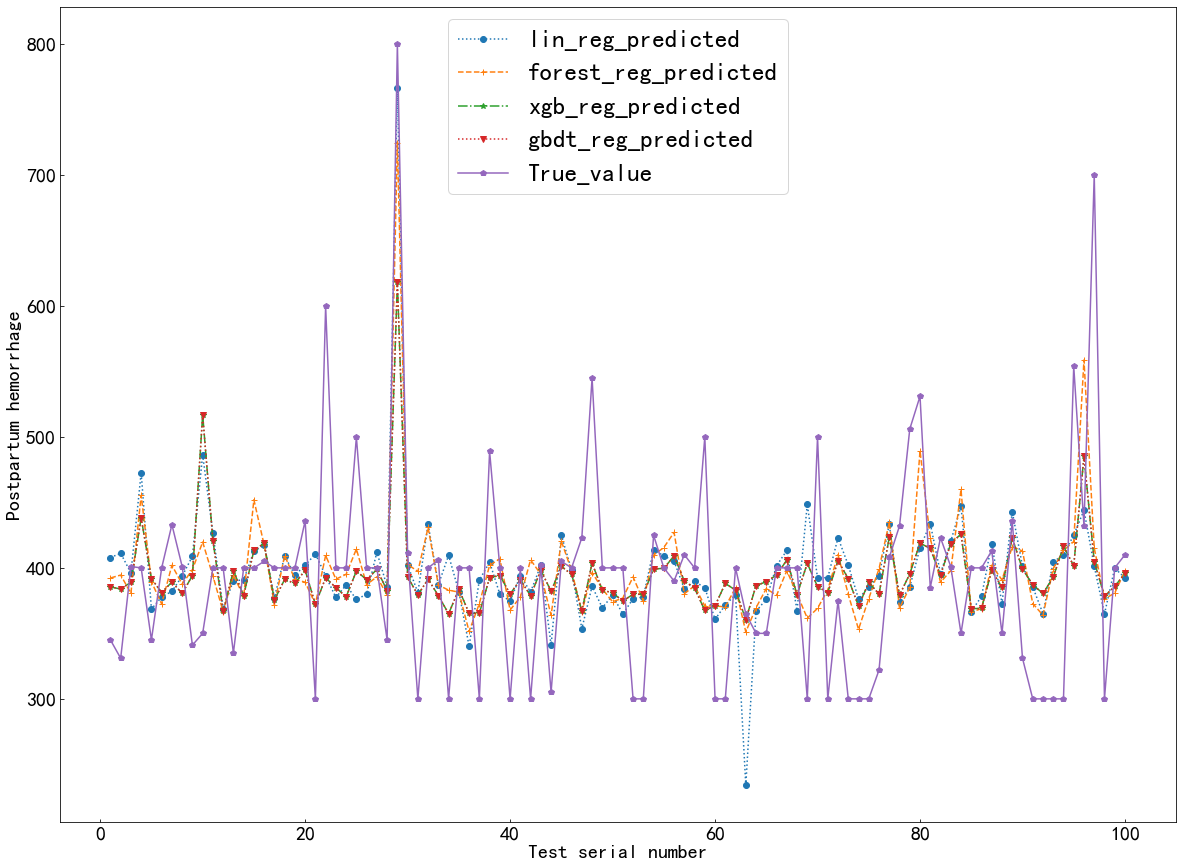

In [ ]:
now = datetime.datetime.now()
now = now.strftime('%y-%m-%d-%H-%M')
#修改不同线型的方法：修改marker='*'或者 linestyle="solid", "dotted", "dashed" or "dashdot",或者颜色cnames（较少选择）
plt.figure(figsize=(20,15))
plt.rcParams['xtick.direction'] = 'in'#将x周的刻度线方向设置向内
plt.rcParams['ytick.direction'] = 'in'#将y轴的刻度方向设置向内
a=200
b=300
# plt.plot(list(range(1,len(y_test[:100])+1)),Logistic_y_pred[:100].tolist(),label='Logistic_predicted',marker='s')
plt.plot(list(range(1,len(y_test[a:b])+1)),lin_reg_y_pred[a:b].tolist(),label='lin_reg_predicted',linestyle="dotted",marker='o')
plt.plot(list(range(1,len(y_test[a:b])+1)),forest_reg_y_pred[a:b].tolist(),label='forest_reg_predicted',linestyle="dashed",marker='+')
plt.plot(list(range(1,len(y_test[a:b])+1)),xgb_reg_y_pred[a:b].tolist(),label='xgb_reg_predicted',linestyle="dashdot",marker='*')
plt.plot(list(range(1,len(y_test[a:b])+1)),gbdt_y_pred[a:b].tolist(),label='gbdt_reg_predicted',linestyle=":",marker='v')

plt.plot(list(range(1,len(y_test[a:b])+1)),y_test[a:b].tolist(),label='True_value',linestyle="solid",marker='p')

# plt.title('模型测试结果')
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.xlabel('Test serial number',fontsize=20)
plt.ylabel('Postpartum hemorrhage',fontsize=20)
plt.legend(loc='best', fontsize=25)
savefig("产后出血量测试结果{}.jpg".format(now),dpi=400,bbox_inches = 'tight')
plt.show()